In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
from netCDF4 import Dataset


In [ ]:
# Root directory: change to where data downloaded to
root_dir = '/data2/jbaldwin/WCAS2023'

In [36]:
# Import HWIND data
sandy_hwind = gpd.read_file(root_dir+'/HAZARD/WIND_SWATHS/HWIND/Sandy/AL182012.shp')
isaac_hwind = gpd.read_file(root_dir+'/HAZARD/WIND_SWATHS/HWIND/Isaac/AL092012.shp')
irene1_hwind = gpd.read_file(root_dir+'/HAZARD/WIND_SWATHS/HWIND/Irene1/Irene_NY.shp')
irene2_hwind = gpd.read_file(root_dir+'/HAZARD/WIND_SWATHS/HWIND/Irene2/Irene_NC.shp')


In [26]:
# Import simulated swath
file = '/HAZARD/WIND_SWATHS/IBTrACS/wspd_usa_swaths_all.nc'
ds = Dataset(root_dir+file)
swath = ds['swath'][:]
lat = ds['lat'][:]
lon = ds['lon'][:]


In [66]:
sandy_sim = swath[995,...]
isaac_sim = swath[993,...]
irene_sim = swath[983,...]

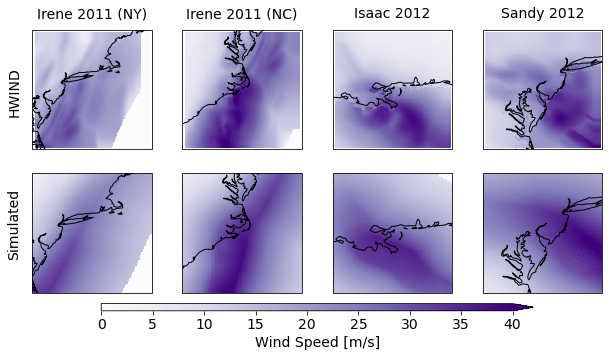

In [99]:
fig = plt.figure(figsize=(10,5))
cmap = plt.cm.Purples
vmin = 0
vmax = 40
plt.rcParams.update({'font.size': 14})

# Irene 1

ax = plt.subplot(241,projection=ccrs.PlateCarree())
plt.scatter(irene1_hwind.LONGITUDE,irene1_hwind.LATITUDE,c=irene1_hwind.MAXSFC,marker='s',transform = ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
#plt.colorbar()
ax.coastlines('50m',color='black')
ax.text(0.5, 1.1, 'Irene 2011 (NY)', fontsize=14,transform=ax.transAxes,horizontalalignment='center')
ax.text(-0.15, 0.3, 'HWIND', fontsize=14,transform=ax.transAxes,horizontalalignment='center',rotation=90)

lonmin = np.min(irene1_hwind.LONGITUDE)
lonmax = np.max(irene1_hwind.LONGITUDE)
latmin = np.min(irene1_hwind.LATITUDE)
latmax = np.max(irene1_hwind.LATITUDE)

ax = plt.subplot(245,projection = ccrs.PlateCarree())
plt.pcolormesh(lon,lat,irene_sim,transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
#plt.colorbar()
ax.set_extent([lonmin,lonmax,latmin,latmax])
ax.coastlines('50m',color='black')
ax.text(-0.15, 0.3, 'Simulated', fontsize=14,transform=ax.transAxes,horizontalalignment='center',rotation=90)

# Irene 2

ax = plt.subplot(242,projection=ccrs.PlateCarree())
plt.scatter(irene2_hwind.LONGITUDE,irene2_hwind.LATITUDE,c=irene2_hwind.MAXSFC,marker='s',transform = ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
#plt.colorbar()
ax.coastlines('50m',color='black')
ax.text(0.5, 1.1, 'Irene 2011 (NC)', fontsize=14,transform=ax.transAxes,horizontalalignment='center')

lonmin = np.min(irene2_hwind.LONGITUDE)
lonmax = np.max(irene2_hwind.LONGITUDE)
latmin = np.min(irene2_hwind.LATITUDE)
latmax = np.max(irene2_hwind.LATITUDE)

ax = plt.subplot(246,projection = ccrs.PlateCarree())
p = plt.pcolormesh(lon,lat,irene_sim,transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
#plt.colorbar()
ax.set_extent([lonmin,lonmax,latmin,latmax])
ax.coastlines('50m',color='black')

# Isaac

ax = plt.subplot(243,projection=ccrs.PlateCarree())
plt.scatter(isaac_hwind.LONGITUDE,isaac_hwind.LATITUDE,c=isaac_hwind.MAXSFC,marker='s',transform = ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
#plt.colorbar()
ax.coastlines('50m',color='black')
ax.text(0.5, 1.1, 'Isaac 2012', fontsize=14,transform=ax.transAxes,horizontalalignment='center')

lonmin = np.min(isaac_hwind.LONGITUDE)
lonmax = np.max(isaac_hwind.LONGITUDE)
latmin = np.min(isaac_hwind.LATITUDE)
latmax = np.max(isaac_hwind.LATITUDE)

ax = plt.subplot(247,projection = ccrs.PlateCarree())
plt.pcolormesh(lon,lat,isaac_sim,transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
#plt.colorbar()
ax.set_extent([lonmin,lonmax,latmin,latmax])
ax.coastlines('50m',color='black')

# Sandy

ax = plt.subplot(244,projection=ccrs.PlateCarree())
plt.scatter(sandy_hwind.LONGITUDE,sandy_hwind.LATITUDE,c=sandy_hwind.MAXSFC,marker='s',transform = ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
#plt.colorbar()
ax.coastlines('50m',color='black')
ax.text(0.5, 1.1, 'Sandy 2012', fontsize=14,transform=ax.transAxes,horizontalalignment='center')

lonmin = np.min(sandy_hwind.LONGITUDE)
lonmax = np.max(sandy_hwind.LONGITUDE)
latmin = np.min(sandy_hwind.LATITUDE)
latmax = np.max(sandy_hwind.LATITUDE)

ax = plt.subplot(248,projection = ccrs.PlateCarree())
plt.pcolormesh(lon,lat,sandy_sim,transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
#plt.colorbar()
ax.set_extent([lonmin,lonmax,latmin,latmax])
ax.coastlines('50m',color='black')

# COLORBAR
plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.1)
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02]) # x pos, y pos, x width, y width
cb = fig.colorbar(p, cax=cbar_ax, orientation='horizontal',extend='max')
cb.set_label(label='Wind Speed [m/s]')

plt.savefig(root_dir+'/FIGURES/swath_validation.png',dpi=600)
